In [1]:
import torch
from diffusers import AutoPipelineForInpainting, KandinskyV22InpaintCombinedPipeline

from models.combined_pipeline import CombinedPipeline


In [2]:
# pipe = KandinskyV22InpaintCombinedPipeline.from_pretrained('kandinsky-community/kandinsky-2-2-decoder-inpaint', torch_dtype=torch.float16)

In [3]:
# CombinedPipeline(
#     unet=pipe.unet,
#     scheduler=pipe.scheduler,
#     movq=pipe.movq,
#     image_encoder=pipe.prior_image_encoder,
#     text_encoder=pipe.prior_text_encoder,
#     tokenizer=pipe.prior_tokenizer,
#     image_processor=pipe.prior_image_processor,
# ).save_pretrained('../models/weights/img2img-painting')

In [4]:
pipe = CombinedPipeline.from_pretrained('../models/weights/img2img-painting', torch_dtype=torch.float16, variant='fp16', use_safetensors=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
lora_model_path = '../models/weights/img2img-painting-lora/pytorch_lora_weights.safetensors'
pipe.load_lora_weights(lora_model_path)

C:\Users\Alexey\anaconda3\envs\hands-tracking\lib\site-packages\diffusers\loaders.py:1386: UserWarning: You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet.{module_name}': params for module_name, params in old_state_dict.items()}`.
  warnings.warn(warn_message)


In [6]:
pipe.unet

UNet2DConditionModel(
  (conv_in): Conv2d(9, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=384, out_features=1536, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1536, out_features=1536, bias=True)
  )
  (encoder_hid_proj): ImageProjection(
    (image_embeds): Linear(in_features=1280, out_features=24576, bias=True)
    (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (add_embedding): ImageTimeEmbedding(
    (image_proj): Linear(in_features=1280, out_features=1536, bias=True)
    (image_norm): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
  )
  (down_blocks): ModuleList(
    (0): ResnetDownsampleBlock2D(
      (resnets): ModuleList(
        (0-2): 3 x ResnetBlock2D(
          (norm1): GroupNorm(32, 384, eps=1e-05, affine=True)
          (conv1): LoRACompatibleConv(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

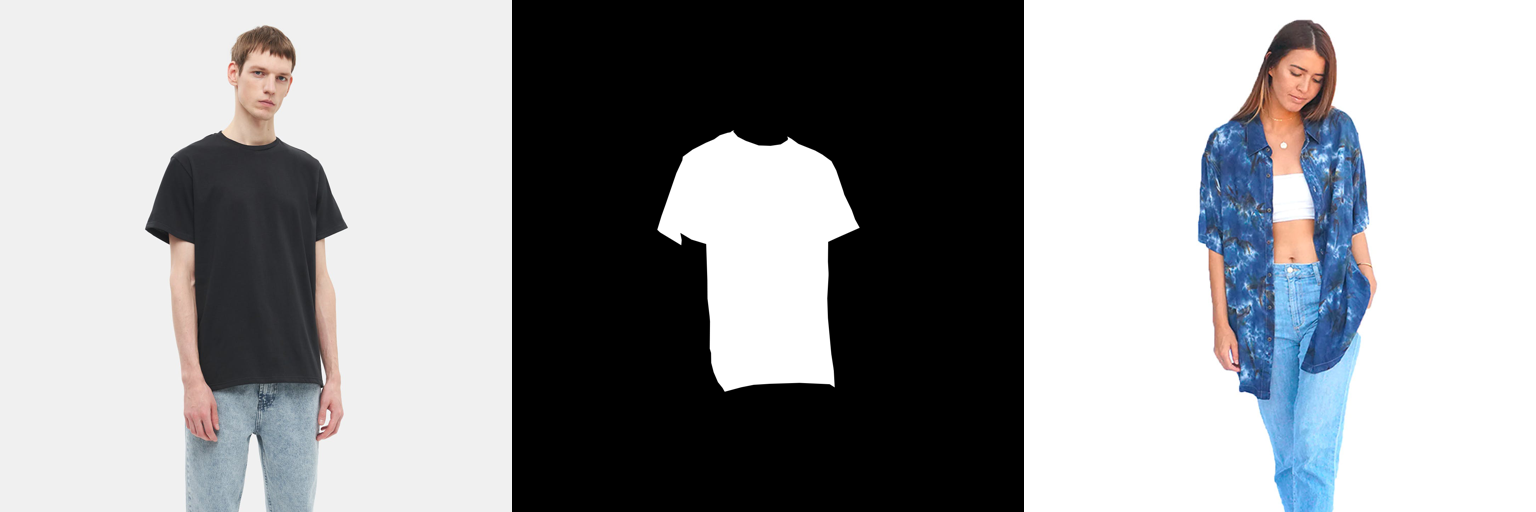

In [7]:
from PIL import Image
from diffusers.utils import make_image_grid

img_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
mask_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
example_url = "https://i.pinimg.com/originals/46/2b/5d/462b5da6357232845a2cb56bfe98d87c.jpg"

source_image  = Image.open('../cache/in/01.jpg').resize((512, 512))
mask_image = Image.open('../cache/in/01_mask.png').resize((512, 512))
# panda_image = load_image('https://i.pinimg.com/originals/3f/96/36/3f9636b0c94bf6de4b33f0ed924fded7.jpg').resize((512, 512))
target_image = Image.open('../cache/in/03.jpg').resize((512, 512))

make_image_grid([source_image, mask_image, target_image], 1, 3)

In [8]:
pipe.enable_model_cpu_offload()

In [13]:
pipe(source_image, target_image, guidance_scale=4, num_inference_steps=100,
    cross_attention_kwargs={"scale": 0.5},).images[0].save('output.png')

  0%|          | 0/100 [00:00<?, ?it/s]